## Exercises & Extra-curriculum

In [ ]:
# 0. Import libraries and write device agnostic code
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Available device: {device}")

Available device: cuda


### 1. Data

In [ ]:
# 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step, dtype=torch.float).unsqueeze(dim=1)
y = weight * X + bias

data_split = int(0.8*len(X))

X_train, y_train = X[:data_split], y[:data_split]
X_test, y_test = X[data_split:], y[data_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={'size': 14})

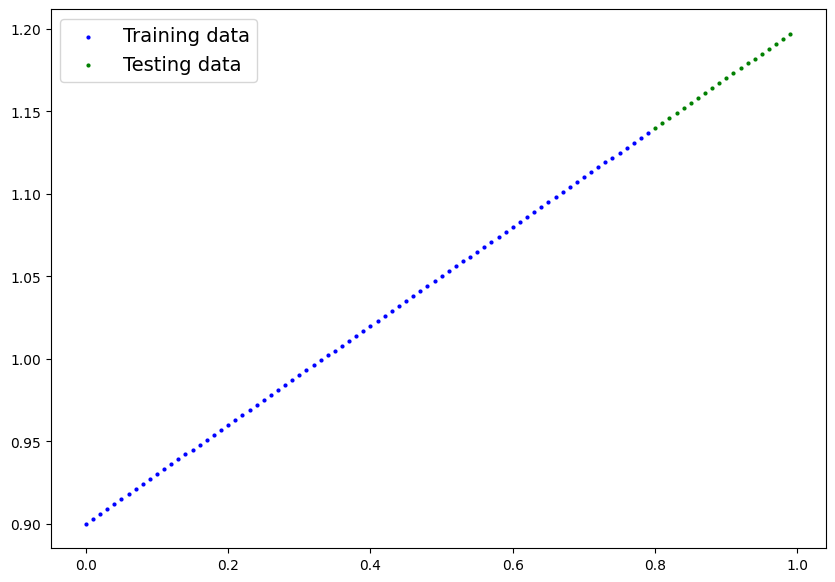

In [ ]:
plot_predictions()

### 2. Model

In [ ]:
# 2. Build a PyTorch model by subclassing nn.Module.

class LinearRegressionModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
        # self.weight = nn.Parameter(torch.randn(1,
        #                           requires_grad=True,
        #                           dtype=torch.float))
        
        # self.bias = nn.Parameter(torch.randn(1,
        #                         requires_grad=True,
        #                         dtype=torch.float))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
        # return self.weight*x + self.bias

In [ ]:
model_3 = LinearRegressionModelV3()
model_3.to(device)
model_3, model_3.state_dict()

(LinearRegressionModelV3(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.2343]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.9186], device='cuda:0'))]))

### 3. Training

In [ ]:
# 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                         lr=0.01)

In [ ]:
epochs = 300

epoch_values = []
loss_values = []
test_loss_values = []

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_3.train()
    y_pred = model_3(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_pred = model_3(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch % 20 == 0:
        epoch_values.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss: 4f} | Test Loss: {test_loss: 4f}")

Epoch: 0 | Loss:  0.193486 | Test Loss:  0.447041
Epoch: 20 | Loss:  0.099743 | Test Loss:  0.277454
Epoch: 40 | Loss:  0.082861 | Test Loss:  0.209524
Epoch: 60 | Loss:  0.075246 | Test Loss:  0.179513
Epoch: 80 | Loss:  0.068345 | Test Loss:  0.160776
Epoch: 100 | Loss:  0.061494 | Test Loss:  0.144448
Epoch: 120 | Loss:  0.054642 | Test Loss:  0.128463
Epoch: 140 | Loss:  0.047791 | Test Loss:  0.112134
Epoch: 160 | Loss:  0.040940 | Test Loss:  0.095807
Epoch: 180 | Loss:  0.034088 | Test Loss:  0.079823
Epoch: 200 | Loss:  0.027236 | Test Loss:  0.063496
Epoch: 220 | Loss:  0.020385 | Test Loss:  0.047340
Epoch: 240 | Loss:  0.013534 | Test Loss:  0.031013
Epoch: 260 | Loss:  0.006681 | Test Loss:  0.015029
Epoch: 280 | Loss:  0.003224 | Test Loss:  0.006560


### 4. Making and evaluating predictions

In [ ]:
# 4. Make predictions with the trained model on the test data.
model_3.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2925]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8997], device='cuda:0'))])

In [ ]:
model_3.eval()

with torch.inference_mode():
    y_preds = model_3(X_test)
y_preds

tensor([[1.1337],
        [1.1367],
        [1.1396],
        [1.1425],
        [1.1454],
        [1.1484],
        [1.1513],
        [1.1542],
        [1.1571],
        [1.1601],
        [1.1630],
        [1.1659],
        [1.1688],
        [1.1718],
        [1.1747],
        [1.1776],
        [1.1805],
        [1.1835],
        [1.1864],
        [1.1893]], device='cuda:0')

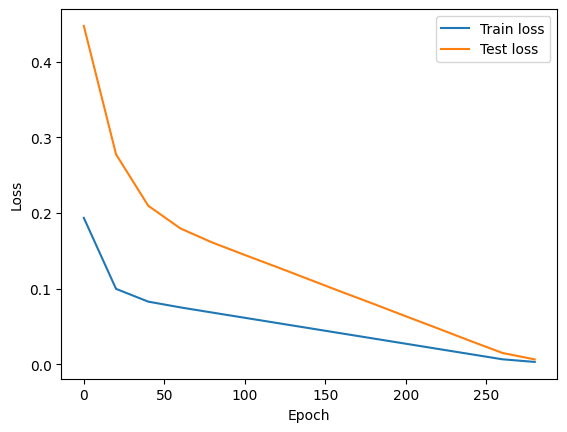

In [ ]:
plt.plot(epoch_values, torch.tensor(loss_values).cpu(), label='Train loss')
plt.plot(epoch_values, torch.tensor(test_loss_values).cpu(), label='Test loss')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.legend()

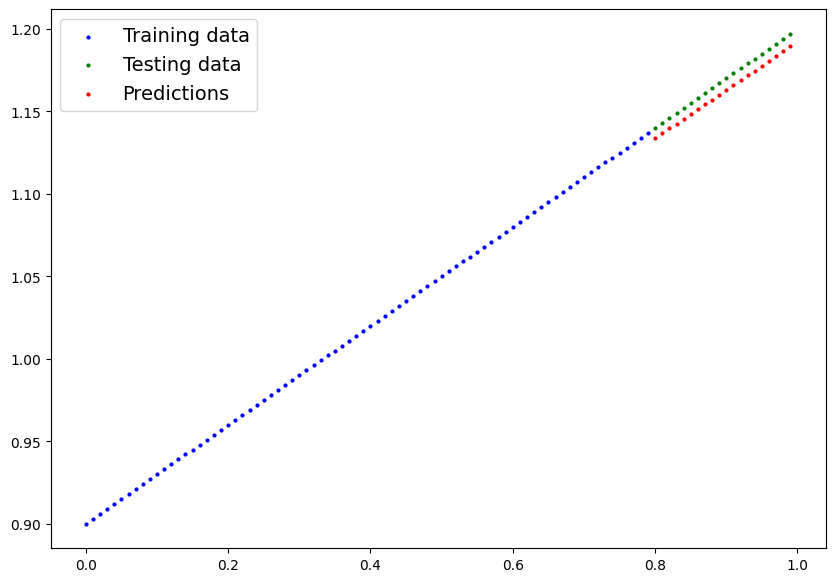

In [ ]:
plot_predictions(predictions=y_preds.cpu())

### 5. Save & load a trained model

In [ ]:
# 5. Save your trained model's state_dict() to file.
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [ ]:
torch.save(obj=model_3.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
loaded_model_3 = LinearRegressionModelV3()

loaded_model_3.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_3.to(device)
loaded_model_3.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2925]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8997], device='cuda:0'))])

In [ ]:
loaded_model_3.eval()
with torch.inference_mode():
    y_preds_new = loaded_model_3(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

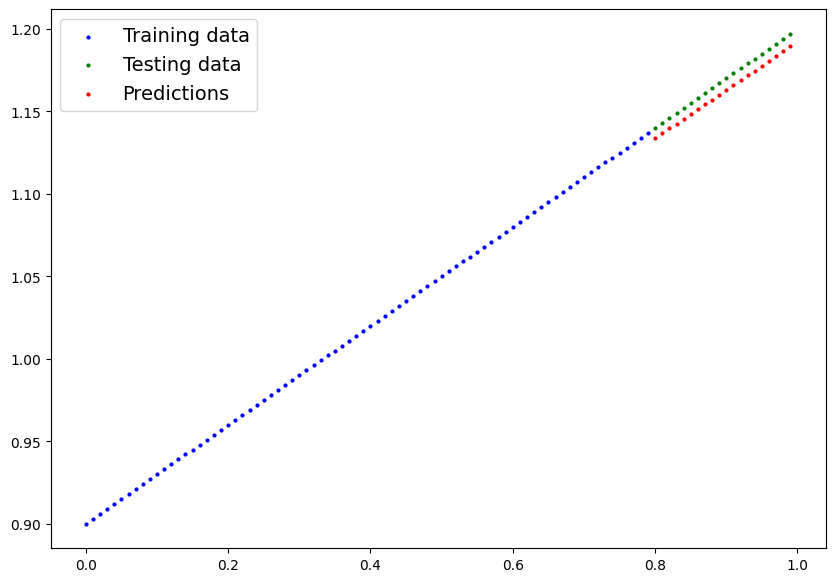

In [ ]:
plot_predictions(predictions=y_preds.cpu())